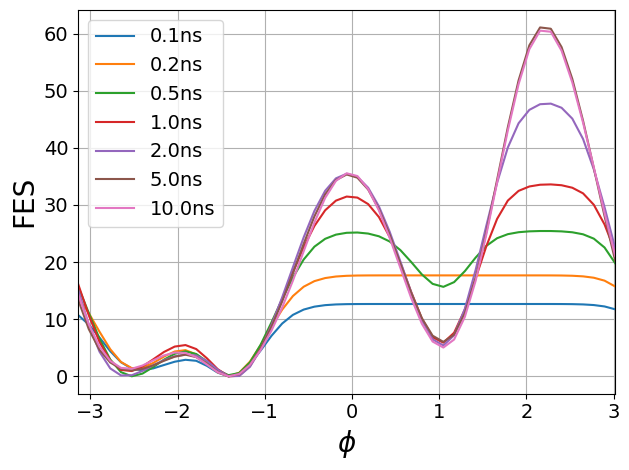

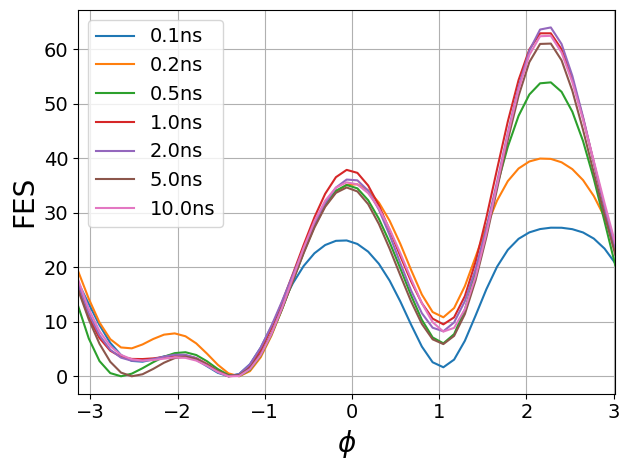

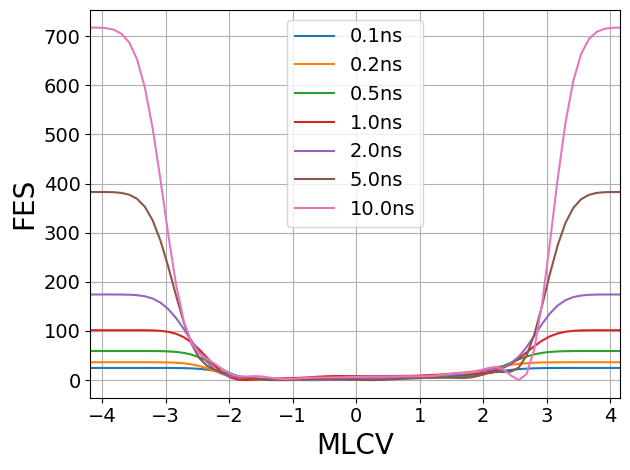

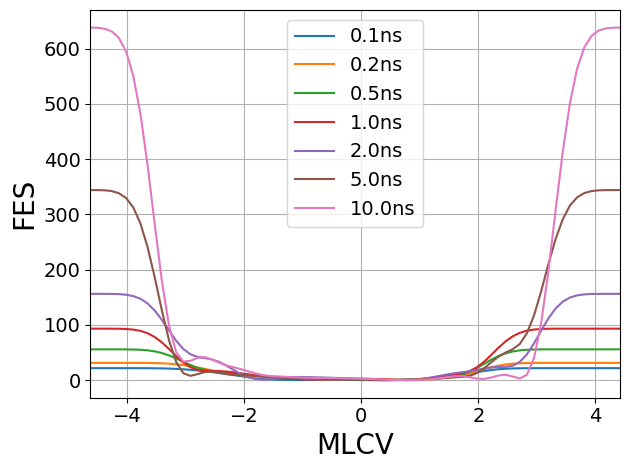

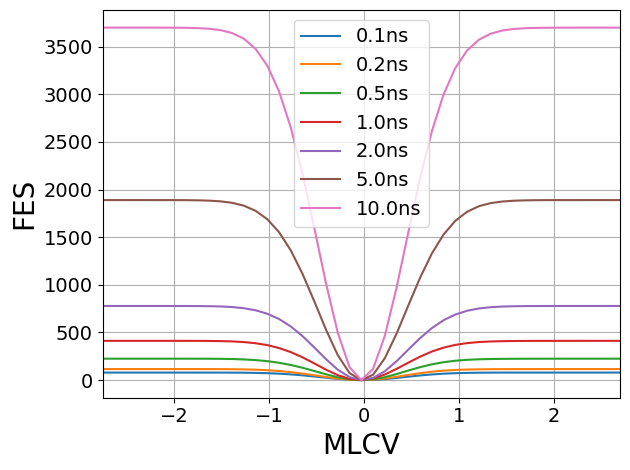

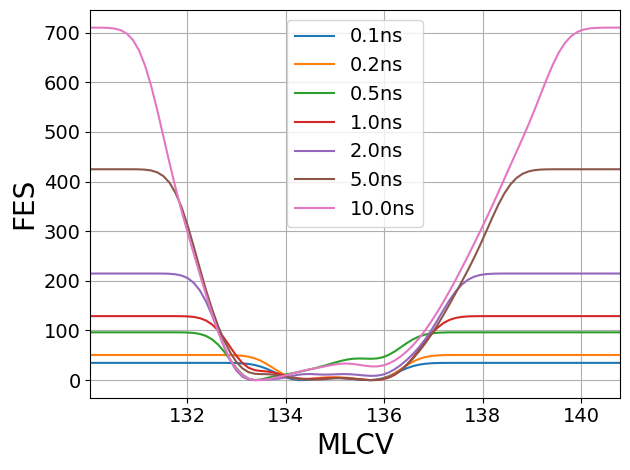

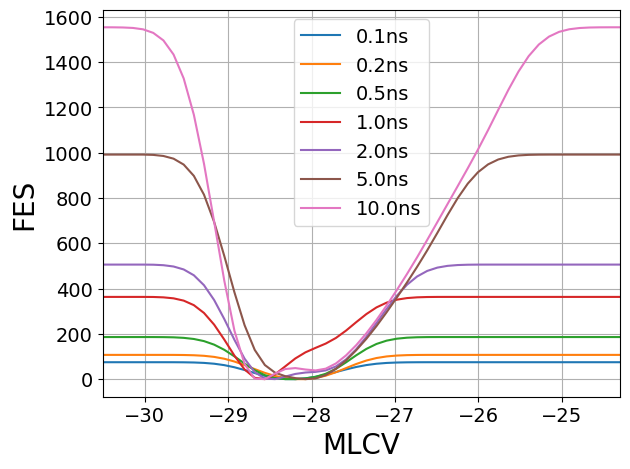

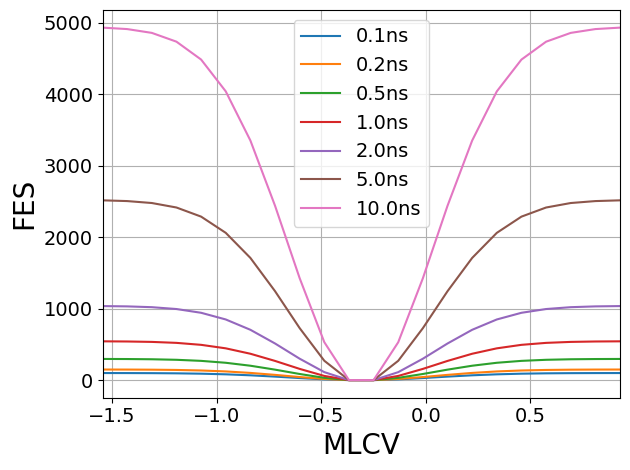

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

def marginalize(free):    
    # Filter data based on conditions
    free = free.reshape(51,51)
    
    # Calculate free energies
    free = -2.49 * np.logaddexp.reduce(-1 / 2.49 * free, 0)
    return free
    
def plot(method, ns, fes_dir):
    # Iterate through all subdirectories
    for t in [1,2,5,10,20,50,100]:
        file = os.path.join(fes_dir, f"{t}.dat")
    
        # Load data from the file
        data = np.loadtxt(file, comments='#')
        
        with open(file, 'r') as file:
            first_line = file.readline().strip()
            
        keys = first_line.split()[2:]
        cv_idx = keys.index(cv_name[method])
        free_idx = keys.index('file.free')
        cv = data[:, cv_idx]
        free = data[:, free_idx]
        if method == 'ref':
            free = marginalize(free)
            cv = np.arange(-np.pi, np.pi, 2*np.pi/51)

        pmf = free - free.min()
        plt.plot(cv, pmf, label=f'{t*0.1}ns')

    plt.xlabel(x_labels[method], fontsize=20, fontweight="medium")
    plt.ylabel('FES', fontsize=20, fontweight="medium")
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(cv.min(), cv.max())
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../figures/fes_over_time_method={method}_ns={ns}.png', dpi=300, bbox_inches="tight")
    # plt.savefig(f'../figures/fes_over_time_method={method}_ns={ns}.pdf', dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

ns = '1'

cv_name = {
    'ref': 'phi',
    'phi': 'phi',
    'AE': 'deep.node-0',
    'TAE': 'deep.node-0',
    'VDE': 'deep.node-0',
    'DeepTDA': 'deep.node-0',
    'DeepLDA': 'deep.node-0',
    'DeepTICA': 'deep.node-0',
}
x_labels = {
    'ref': r'$\phi$',
    'phi': r'$\phi$',
    'AE': 'MLCV',
    'TAE': 'MLCV',
    'VDE': 'MLCV',
    'DeepTDA': 'MLCV',
    'DeepLDA': 'MLCV',
    'DeepTICA': 'MLCV',
}

methods = ['ref', 'phi', 'AE', 'TAE', 'VDE', 'DeepTDA', 'DeepLDA', 'DeepTICA']
for method in methods:
    base_dir = f'/home/guest_sky/enhance/simulations/aldp/{method}/{ns}/log'
    date = sorted(os.listdir(base_dir))[-1]
    fes_dir = os.path.join(base_dir, date, '0', 'fes')
    plot(method, ns, fes_dir)